In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
plt.rcParams['axes.grid'] = True

In [3]:
dat = pd.read_csv("../case-hosp-death.csv")
dat["DATE_OF_INTEREST"] = pd.to_datetime(dat["DATE_OF_INTEREST"])
dat = dat.set_index("DATE_OF_INTEREST")

In [4]:
dat.head()

,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT
DATE_OF_INTEREST,,,
2020-03-02,1,12.0,NaN
2020-03-03,3,7.0,NaN
2020-03-04,10,10.0,NaN
2020-03-05,2,15.0,NaN
2020-03-06,8,11.0,NaN


Text(0.5, 1.0, 'Cases/day')

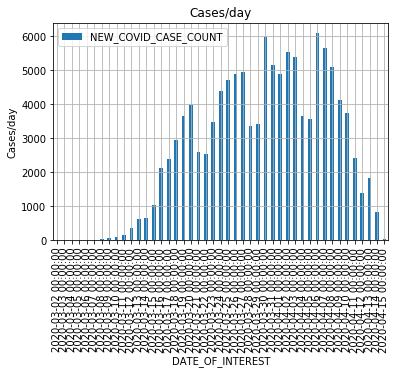

In [5]:
dat[["NEW_COVID_CASE_COUNT"]].plot(kind="bar")
plt.ylabel("Cases/day")
plt.title("Cases/day")

In [6]:
dat["Cases/day, 7 day avg"] = dat["NEW_COVID_CASE_COUNT"].rolling(window="7D").mean()

Text(0.5, 1.0, 'Cases/day, 7 day average')

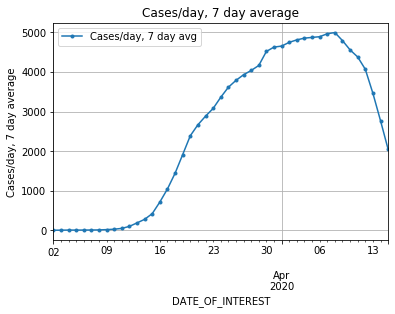

In [7]:
dat[["Cases/day, 7 day avg"]].plot(style=".-")
plt.ylabel("Cases/day, 7 day average")
plt.title("Cases/day, 7 day average")

In [23]:
hdat = pd.read_csv("../history.csv")

In [24]:
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT
0,2020-03-02,2020-03-26 11:26:41,1.00,NaN,NaN,NaN,NaN,1
1,2020-03-03,2020-03-26 11:26:41,1.50,NaN,NaN,3.0,3.000000,2
2,2020-03-04,2020-03-26 11:26:41,4.00,NaN,NaN,3.0,3.000000,9
3,2020-03-05,2020-03-26 11:26:41,3.25,NaN,NaN,4.0,3.333333,1
4,2020-03-06,2020-03-26 11:26:41,4.20,NaN,NaN,5.0,3.750000,8


In [25]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="Cases/day, 7 day avg")

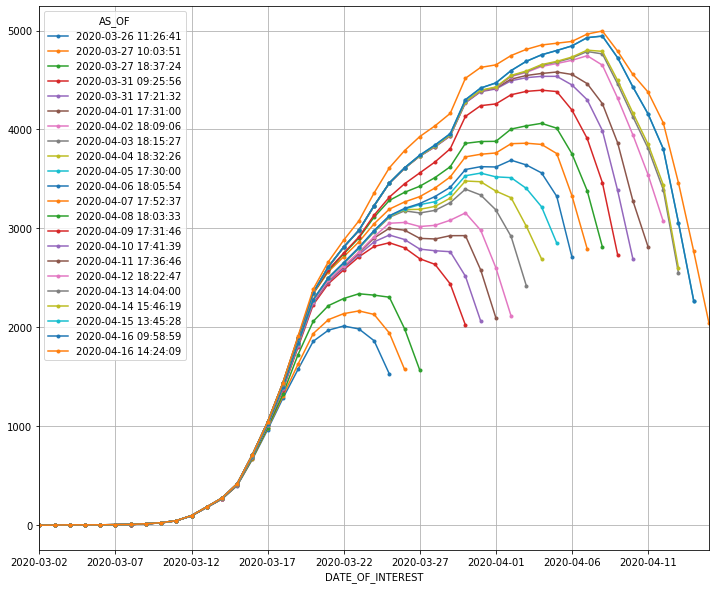

In [26]:
fig, ax = plt.subplots(figsize=(12,10))
dp.plot(style=".-", ax=ax)
#date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#plt.show()

In [27]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="Deaths/day, 7 day avg")

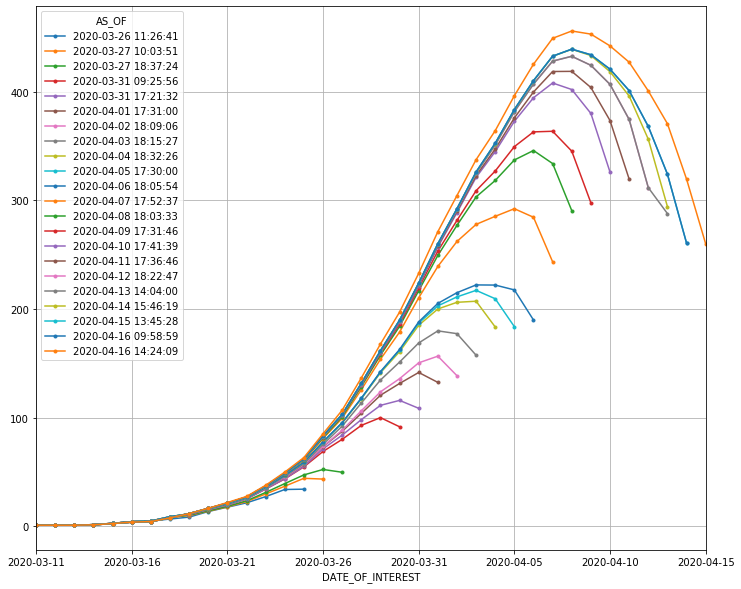

In [28]:
fig, ax = plt.subplots(figsize=(12,10))
dp.plot(style=".-", ax=ax)

In [29]:
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT
0,2020-03-02,2020-03-26 11:26:41,1.00,NaN,NaN,NaN,NaN,1
1,2020-03-03,2020-03-26 11:26:41,1.50,NaN,NaN,3.0,3.000000,2
2,2020-03-04,2020-03-26 11:26:41,4.00,NaN,NaN,3.0,3.000000,9
3,2020-03-05,2020-03-26 11:26:41,3.25,NaN,NaN,4.0,3.333333,1
4,2020-03-06,2020-03-26 11:26:41,4.20,NaN,NaN,5.0,3.750000,8


In [30]:
hdat["Days"] = hdat.groupby("DATE_OF_INTEREST").cumcount()

In [31]:
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT,Days
0,2020-03-02,2020-03-26 11:26:41,1.00,NaN,NaN,NaN,NaN,1,0
1,2020-03-03,2020-03-26 11:26:41,1.50,NaN,NaN,3.0,3.000000,2,0
2,2020-03-04,2020-03-26 11:26:41,4.00,NaN,NaN,3.0,3.000000,9,0
3,2020-03-05,2020-03-26 11:26:41,3.25,NaN,NaN,4.0,3.333333,1,0
4,2020-03-06,2020-03-26 11:26:41,4.20,NaN,NaN,5.0,3.750000,8,0


In [32]:
hdat[hdat["DATE_OF_INTEREST"] == "2020-03-06"]

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT,Days
4,2020-03-06,2020-03-26 11:26:41,4.2,NaN,NaN,5.0,3.75,8,0
28,2020-03-06,2020-03-27 10:03:51,4.2,NaN,NaN,5.0,3.75,8,1
53,2020-03-06,2020-03-27 18:37:24,4.4,NaN,NaN,5.0,3.40,8,2
79,2020-03-06,2020-03-31 09:25:56,4.4,NaN,NaN,5.0,3.60,8,3
108,2020-03-06,2020-03-31 17:21:32,4.4,NaN,NaN,5.0,3.60,8,4
138,2020-03-06,2020-04-01 17:31:00,4.4,NaN,NaN,5.0,3.40,8,5
169,2020-03-06,2020-04-02 18:09:06,4.6,NaN,NaN,5.0,3.60,8,6
201,2020-03-06,2020-04-03 18:15:27,4.6,NaN,NaN,5.0,4.20,8,7
234,2020-03-06,2020-04-04 18:32:26,4.6,NaN,NaN,5.0,4.00,8,8
268,2020-03-06,2020-04-05 17:30:00,4.6,NaN,NaN,5.0,4.00,8,9


In [42]:
df = hdat.groupby("DATE_OF_INTEREST").diff()

In [47]:
df["DATE_OF_INTEREST"] = hdat["DATE_OF_INTEREST"]
df["AS_OF"] = hdat["AS_OF"]
df["Days"] = hdat["Days"]

In [49]:
d2 = df.pivot_table(index="Days",
                   columns="DATE_OF_INTEREST",
                   values="Deaths/day, 7 day avg")

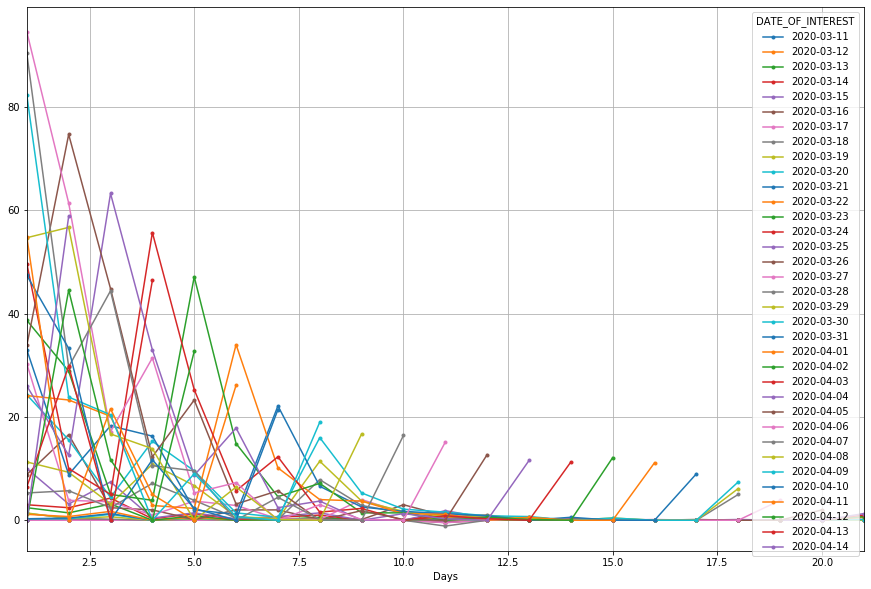

In [51]:
fig, ax = plt.subplots(figsize=(15,10))
d2.plot(style=".-", ax=ax)

In [61]:
d3 = df.pivot_table(index="Days",
                   columns="DATE_OF_INTEREST",
                   values="NEW_COVID_CASE_COUNT")

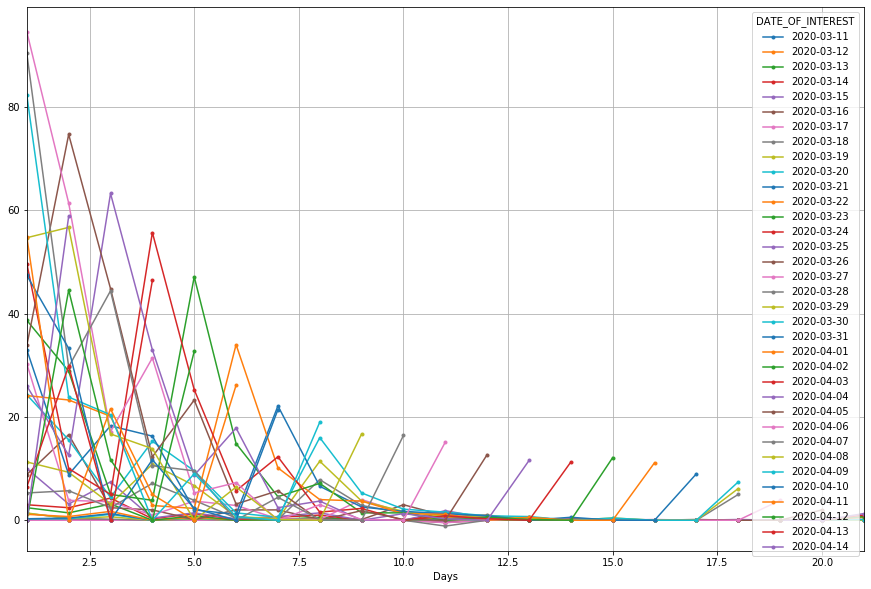

In [62]:
fig, ax = plt.subplots(figsize=(15,10))
d2.plot(style=".-", ax=ax)

In [55]:
d2[["2020-04-14", "Days"]]

KeyError: "['Days'] not in index"

In [57]:
d2["DATE_OF_INTEREST"]

KeyError: 'DATE_OF_INTEREST'

In [58]:
d2.head()

DATE_OF_INTEREST,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,...,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14
Days,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.333333,1.404762,0.285714,...,33.857143,94.571429,90.428571,54.714286,82.285714,47.428571,54.857143,0.000000,6.452381,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,0.333333,0.285714,...,74.714286,61.428571,29.714286,56.714286,23.857143,33.285714,0.000000,44.571429,29.857143,58.857143
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.666667,1.142857,...,44.857143,17.142857,44.428571,16.714286,20.428571,0.000000,21.571429,11.714286,0.000000,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,12.285714,31.428571,10.571429,13.857143,0.000000,11.714286,5.000000,0.000000,46.428571,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.333333,0.428571,...,23.285714,5.285714,9.571429,0.000000,9.000000,2.285714,0.000000,32.714286,NaN,NaN


In [60]:
hdat[hdat["DATE_OF_INTEREST"] == "2020-04-01"]

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT,Days
164,2020-04-01,2020-04-01 17:31:00,2096.714286,37.0,132.428571,NaN,612.666667,43,0
195,2020-04-01,2020-04-02 18:09:06,2602.857143,145.0,156.571429,117.0,635.714286,1047,1
227,2020-04-01,2020-04-03 18:15:27,3187.428571,181.0,179.857143,567.0,769.000000,2761,2
260,2020-04-01,2020-04-04 18:32:26,3377.571429,211.0,200.000000,818.0,832.285714,3170,3
294,2020-04-01,2020-04-05 17:30:00,3521.000000,217.0,202.857143,905.0,862.428571,3571,4
329,2020-04-01,2020-04-06 18:05:54,3621.000000,225.0,205.142857,944.0,880.142857,3823,5
365,2020-04-01,2020-04-07 17:52:37,3762.714286,311.0,239.142857,1138.0,1199.000000,4017,6
402,2020-04-01,2020-04-08 18:03:33,3880.285714,337.0,249.285714,1157.0,1213.857143,4089,7
440,2020-04-01,2020-04-09 17:31:46,4258.285714,349.0,253.285714,1162.0,1219.285714,4287,8
479,2020-04-01,2020-04-10 17:41:39,4409.571429,363.0,257.000000,1439.0,1365.285714,4684,9
